210803 - Korea Univ. Machine Learning Mini Project

In [1]:
# 데이터 전처리 패키지
import numpy as np
import pandas as pd

# 기계학습 모델 구축 및 평가 패키지
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.preprocessing import StandardScaler,MinMaxScaler, MaxAbsScaler,RobustScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

# 데이터 시각화 패키지
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import statsmodels.api as sm
from statsmodels.formula.api import ols
from collections import Counter

# 경고 숨기기
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# MAPE def.
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [2]:
# 데이터 불러오기
data = pd.read_csv("C:/py_workspace/korea_py/prj_st/pt_train_dt.csv")

## Data 탐색 및 전처리

In [3]:
data.head(3)

,lot_id,wf,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,...,x_395,x_396,x_397,x_398,x_399,x_400,y_1,y_2,y_3,split
0,TDRM795W,9,1.473766,85.908215,249.959409,47.834938,856.046648,2500.0,0.495354,0.565273,...,64.0,64.0,64.0,64.0,64.0,64.0,56.55,58.9400,57.5425,train
1,TDRM129W,3,0.023678,99.979704,249.959409,0.270607,1001.481572,2500.0,0.000000,0.000000,...,55.0,55.0,55.0,55.0,55.0,55.0,57.68,59.7750,58.2325,train
2,TDRLY92W,11,0.007380,88.220968,249.959409,0.000000,882.352941,2500.0,0.366233,0.470358,...,75.0,75.0,75.0,75.0,75.0,75.0,54.67,58.4675,56.1875,train


In [4]:
d_columns = data.columns[1:402]

In [5]:
for col in d_columns:
    data[col] = data[col].fillna(data[col].median())

In [6]:
X = data.drop(['lot_id','split','y_1','y_2','y_3'], axis=1)
Y = data[['y_1','y_2','y_3']]

In [7]:
# 학습 : 검증 : 테스트 = 6 : 3 : 1 데이터 분리
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.4, random_state=2021)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_valid, Y_valid, test_size=0.25, random_state=2021)

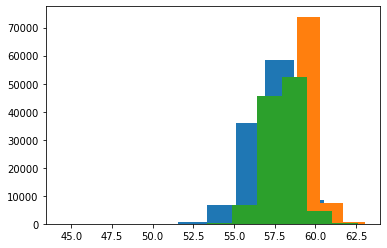

In [8]:
plt.hist(data.y_1)
plt.hist(data.y_2)
plt.hist(data.y_3)
plt.show()

In [9]:
# Outlier 처리 예정




# Scaling

### Robust Scaler

In [10]:
Robust_scaler = RobustScaler()
Robust_scaler.fit(X_train)
X_train_RB = Robust_scaler.transform(X_train)
X_valid_RB = Robust_scaler.transform(X_valid)
X_test_RB = Robust_scaler.transform(X_test)

In [11]:
pd.DataFrame(X_train_RB).describe()

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
count,66075.000000,66075.000000,66075.000000,66075.000000,66075.000000,66075.000000,66075.000000,66075.000000,66075.000000,66075.000000,...,66075.000000,66075.000000,66075.000000,66075.000000,66075.000000,66075.000000,66075.000000,66075.000000,66075.000000,66075.000000
mean,0.001825,2.655299,0.034130,2.932547,13.873002,0.104574,23.837187,0.554450,0.613246,0.647430,...,0.009792,0.003396,-0.004501,-0.016255,-0.013828,-0.011558,-0.010006,-0.006643,0.005332,-0.001942
std,0.599260,5.317912,0.941295,40.321962,29.473635,0.884317,330.780070,1.759197,1.963202,7.518325,...,0.580575,0.591817,0.589719,0.607625,0.608499,0.618856,0.609775,0.610192,0.593482,0.607671
min,-1.000000,-0.535713,-7.383239,-8.927122,-3.375302,-7.393671,-89.314708,0.000000,0.000000,-2.654906,...,-0.972222,-1.142857,-1.077877,-1.147059,-1.147059,-1.165056,-1.147059,-1.147059,-1.114286,-1.157895
25%,-0.500000,-0.038997,-0.471853,0.000000,-0.066407,-0.463965,0.000000,0.000000,0.000000,-0.406062,...,-0.500000,-0.485714,-0.508581,-0.529412,-0.529412,-0.521777,-0.500000,-0.500000,-0.485714,-0.485380
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.961003,0.528147,0.000000,0.933593,0.536035,0.000000,1.000000,1.000000,0.593938,...,0.500000,0.514286,0.491419,0.470588,0.470588,0.478223,0.500000,0.500000,0.514286,0.514620
max,1.000000,75.400141,38.076788,549.040591,188.597505,32.423445,4502.185185,34.896680,22.015448,102.720512,...,1.777778,1.685714,1.750746,1.764706,1.764706,1.792394,1.764706,1.764706,1.714286,1.736842


### MaxAbs Scaler

In [12]:
MA_scaler = MaxAbsScaler()
MA_scaler.fit(X_train)
X_train_MA = MA_scaler.transform(X_train)
X_valid_MA = MA_scaler.transform(X_valid)
X_test_MA = MA_scaler.transform(X_test)

In [13]:
pd.DataFrame(X_train_MA).describe()

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
count,66075.000000,66075.000000,66075.000000,66075.000000,66075.000000,66075.000000,66075.000000,66075.000000,66075.000000,66075.000000,...,66075.000000,66075.000000,66075.000000,66075.000000,66075.000000,66075.000000,66075.000000,66075.000000,66075.000000,66075.000000
mean,0.520876,0.035825,0.174749,0.316511,0.074057,0.201224,0.360436,0.015888,0.027855,0.503300,...,0.363525,0.411189,0.385675,0.394473,0.395299,0.396131,0.396598,0.397742,0.401866,0.405336
std,0.287645,0.070485,0.020419,0.050466,0.156194,0.021856,0.047240,0.050412,0.089174,0.036585,...,0.209007,0.207136,0.206398,0.206592,0.206890,0.207161,0.207323,0.207465,0.207719,0.207823
min,0.040000,-0.006469,0.013846,0.301667,-0.017350,0.015901,0.344276,0.000000,0.000000,0.487231,...,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,0.280000,0.000114,0.163773,0.312840,0.000186,0.187172,0.357031,0.000000,0.000000,0.498174,...,0.180000,0.240000,0.209250,0.220000,0.220000,0.225336,0.230000,0.230000,0.230000,0.240000
50%,0.520000,0.000631,0.174009,0.312840,0.000537,0.198639,0.357031,0.000000,0.000000,0.500150,...,0.360000,0.410000,0.387250,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.406000
75%,0.760000,0.013368,0.185466,0.312840,0.005485,0.211888,0.357031,0.028656,0.045423,0.503040,...,0.540000,0.590000,0.559244,0.560000,0.560000,0.560084,0.570000,0.570000,0.580000,0.582000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Modeling

### Linear Regression

In [14]:
# 선형 회귀 모델 학습 - Standard Scaler
model_LR_RB = LinearRegression().fit(X_train_RB, Y_train)
model_LR_RB.score(X_train_RB, Y_train)
model_LR_RB.coef_
model_LR_RB.intercept_
model_LR_RB.predict(X_test_RB)

array([[57.45597653, 59.56814336, 58.29494865],
       [56.82299855, 59.00061666, 57.72318379],
       [57.27668289, 59.18179192, 57.99304907],
       ...,
       [57.8976223 , 59.51703747, 58.54619716],
       [57.63885619, 59.59251333, 58.36443733],
       [57.01899165, 58.92756055, 57.7119848 ]])

In [15]:
model_LR_MA = LinearRegression().fit(X_train_MA, Y_train)
model_LR_MA.score(X_train_MA, Y_train)
model_LR_MA.coef_
model_LR_MA.intercept_
model_LR_MA.predict(X_test_MA)

array([[57.45597653, 59.56814336, 58.29494865],
       [56.82299855, 59.00061666, 57.72318379],
       [57.27668289, 59.18179192, 57.99304907],
       ...,
       [57.8976223 , 59.51703747, 58.54619716],
       [57.63885619, 59.59251333, 58.36443733],
       [57.01899165, 58.92756055, 57.7119848 ]])

In [16]:
model_LR_RB.score(X_train_RB, Y_train)

0.176001665637619

In [17]:
model_LR_MA.score(X_train_MA, Y_train)

0.17600166563761188

In [18]:
train_y_pred_RB = model_LR_RB.predict(X_train_RB)

In [19]:
train_y_pred_MA = model_LR_MA.predict(X_train_MA)

In [20]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [21]:
print("Training MSE : {:.3f}".format(mean_squared_error(Y_train, train_y_pred_RB)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_train, train_y_pred_RB))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_train, train_y_pred_RB)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_train, train_y_pred_RB)))
print("Training R2 : {:.3f}".format(r2_score(Y_train, train_y_pred_RB)))

Training MSE : 0.847
Training RMSE : 0.920
Training MAE : 0.684
Training MAPE : 1.184
Training R2 : 0.176


In [22]:
print("Training MSE : {:.3f}".format(mean_squared_error(Y_train, train_y_pred_MA)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_train, train_y_pred_MA))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_train, train_y_pred_MA)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_train, train_y_pred_MA)))
print("Training R2 : {:.3f}".format(r2_score(Y_train, train_y_pred_MA)))

Training MSE : 0.847
Training RMSE : 0.920
Training MAE : 0.684
Training MAPE : 1.184
Training R2 : 0.176


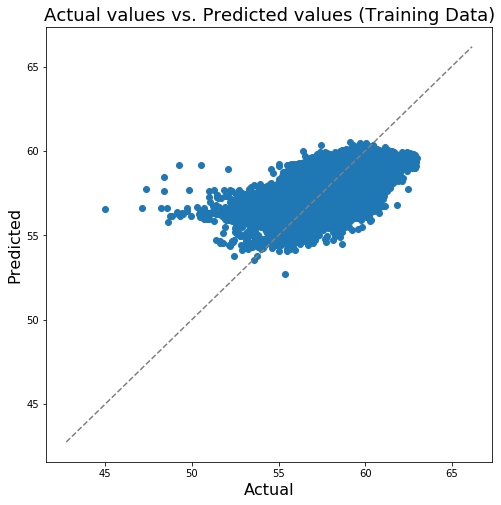

In [23]:
fig_values = np.concatenate([Y_train.squeeze(), train_y_pred_RB.squeeze()])
vmin = np.min(fig_values) * 0.95
vmax = np.max(fig_values) * 1.05

plt.figure(figsize=(8, 8))
plt.title('Actual values vs. Predicted values (Training Data)', size=18)
plt.scatter(Y_train, train_y_pred_RB)
plt.plot([vmin, vmax], [vmin, vmax], color='grey', linestyle='dashed')
plt.xlabel('Actual', size=16)
plt.ylabel('Predicted', size=16)
plt.show()

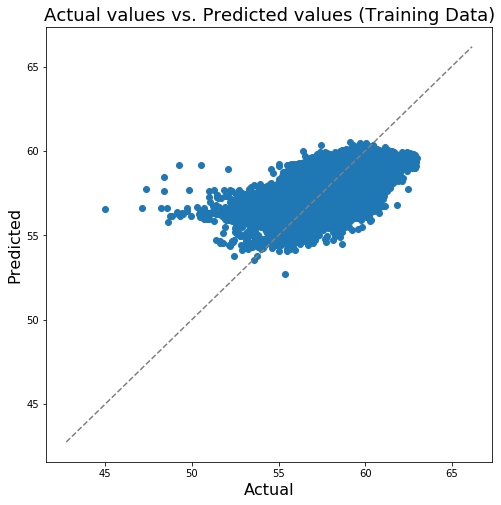

In [24]:
fig_values = np.concatenate([Y_train.squeeze(), train_y_pred_MA.squeeze()])
vmin = np.min(fig_values) * 0.95
vmax = np.max(fig_values) * 1.05

plt.figure(figsize=(8, 8))
plt.title('Actual values vs. Predicted values (Training Data)', size=18)
plt.scatter(Y_train, train_y_pred_MA)
plt.plot([vmin, vmax], [vmin, vmax], color='grey', linestyle='dashed')
plt.xlabel('Actual', size=16)
plt.ylabel('Predicted', size=16)
plt.show()

### Ridge / Lasso / ElasticNet Regression ( with CV )

In [25]:
ridge = Ridge()
alphas = np.logspace(-4, 0, 200)
parameters = {'alpha': alphas }
ridge_reg = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error',cv=5)
ridge_reg.fit(X_train_RB,Y_train)
print(ridge_reg.best_params_)
print(ridge_reg.best_score_)

{'alpha': 0.0006985879746785249}
-0.9837549886177323


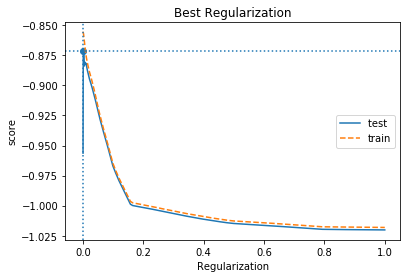

In [35]:
train_scores = []
test_scores = []

for alpha in alphas:
    model = Lasso(alpha=alpha)
    train_score = -mean_squared_error(Y_test, model.fit(X_train_RB, Y_train).predict(X_test_RB))
    test_score = np.mean(cross_val_score(model, X_train_RB, Y_train, scoring="neg_mean_squared_error", cv=5))
    train_scores.append(train_score)
    test_scores.append(test_score)
optimal_alpha = alphas[np.argmax(test_scores)]
optimal_score = np.max(test_scores)

plt.plot(alphas, test_scores, "-", label="test ")
plt.plot(alphas, train_scores, "--", label="train")
plt.axhline(optimal_score, linestyle=':')
plt.axvline(optimal_alpha, linestyle=':')
plt.scatter(optimal_alpha, optimal_score)
plt.title("Best Regularization")
plt.ylabel('score')
plt.xlabel('Regularization')
plt.legend()
plt.show()

In [36]:
lasso = Lasso()
parameters = {'alpha': alphas }
lasso_reg = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error',cv=5)
lasso_reg.fit(X_train_RB,Y_train)
print(lasso_reg.best_params_)
print(lasso_reg.best_score_)

KeyboardInterrupt: 

In [ ]:
elasticnet = ElasticNet()
parameters = {'alpha': alphas }

elasticnet_reg = GridSearchCV(elasticnet, parameters, scoring='neg_mean_squared_error',cv=5)
elasticnet_reg.fit(X_train_RB, Y_train)
print(elasticnet_reg.best_params_)
print(elasticnet_reg.best_score_)

### Decision tree

In [31]:
max_depths = list(range(1, 20)) + [None]
print(max_depths)

rmse_valid = []
mae_valid = []

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, None]


In [32]:
for max_depth in max_depths:
                     
    # 모델 학습
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(X_train_RB, Y_train)
    
    # validation 예측
    y_valid_pred = model.predict(X_valid_RB)
    
    # 모델 평가 결과 저장
    rmse = np.sqrt(mean_squared_error(Y_valid, y_valid_pred))
    mae = mean_absolute_error(Y_valid, y_valid_pred)
    
    rmse_valid.append(rmse)
    mae_valid.append(mae)

In [33]:
xticks = list(map(str, max_depths))
print(xticks)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', 'None']


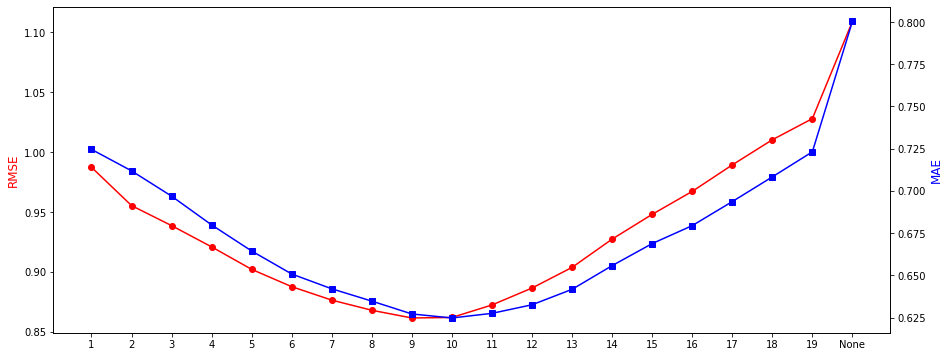

In [34]:
fig, ax = plt.subplots(figsize=(15, 6))

ax.plot(range(len(max_depths)), rmse_valid, color='red', marker='o')
ax.set_ylabel('RMSE', color='red', fontsize=12)

ax2 = ax.twinx()
ax2.plot(range(len(max_depths)), mae_valid, color='blue', marker='s')
ax2.set_ylabel('MAE', color='blue', fontsize=12)

plt.xticks(range(len(max_depths)), xticks)
plt.show()

* Random forest trees

* Gradient boosted trees

* MLP Regressor

## 테스트 데이터셋 성능 평가

In [ ]:
# 학습 데이터 실제 값
test_true = test_data['MEDV']

# 학습 데이터 예측 값
test_pred = lm_trained.predict(test_data.drop(['MEDV'], axis=1))

MSE_value = mean_squared_error(test_true, test_pred)
RMSE_value = np.sqrt(mean_squared_error(test_true, test_pred))
MAE_value = mean_absolute_error(test_true, test_pred)
MAPE_value = mean_absolute_percentage_error(test_true, test_pred)
r2_value = r2_score(test_true, test_pred)

print("Testing MSE : {:.3f}".format(MSE_value))
print("Testing RMSE : {:.3f}".format(RMSE_value))
print("Testing MAE : {:.3f}".format(MAE_value))
print("Testing MAPE : {:.3f}".format(MAPE_value))
print("Testing R2 : {:.3f}".format(r2_value))

## 변수 선별

In [ ]:
# 제거할 변수 이름
drop_var = 

# 설정한 변수 제거
train_data_new = train_data.drop(drop_var, axis=1)
test_data_new = test_data.drop(drop_var, axis=1)

- 테스트 데이터 성능 평가

In [ ]:
# 변수가 제거된 데이터로 학습
lm_new = sm.OLS(train_data_new['MEDV'], train_data_new.drop('MEDV', axis=1))
lm_new_trained = lm_new.fit()
display(lm_new_trained.summary())

In [ ]:
# 학습 데이터 실제 값
test_true = test_data_new['MEDV']

# 학습 데이터 예측 값
test_pred = lm_new_trained.predict(test_data_new.drop(['MEDV'], axis=1))

new_MSE_value = mean_squared_error(test_true, test_pred)
new_RMSE_value = np.sqrt(mean_squared_error(test_true, test_pred))
new_MAE_value = mean_absolute_error(test_true, test_pred)
new_MAPE_value = mean_absolute_percentage_error(test_true, test_pred)
new_r2_value = r2_score(test_true, test_pred)

print('Testing MSE: {:.3f} → {:.3f}'.format(MSE_value, new_MSE_value))
print('Testing RMSE: {:.3f} → {:.3f}'.format(RMSE_value, new_RMSE_value))
print('Testing MAE: {:.3f} → {:.3f}'.format(MAE_value, new_MAE_value))
print('Testing MAPE: {:.3f} → {:.3f}'.format(MAPE_value, new_MAPE_value))
print('Testing R2: {:.3f} → {:.3f}'.format(r2_value, new_r2_value))

* 상관계수가 높은 변수 제거하기

In [ ]:
plt.figure(figsize=(10, 9))
sns.heatmap(data.corr(), cmap=sns.color_palette("coolwarm", 10), annot=True)
plt.show()

In [ ]:
# 제거할 변수 이름
drop_var = "TAX"

# 설정한 변수 제거
train_data_new = train_data.drop(drop_var, axis=1)
test_data_new = test_data.drop(drop_var, axis=1)

In [ ]:
# 변수가 제거된 데이터로 학습
lm_new = sm.OLS(train_data_new['MEDV'], train_data_new.drop('MEDV', axis=1))
lm_new_trained = lm_new.fit()

display(lm_new_trained.summary())

In [ ]:
# 학습 데이터 실제 값
test_true = test_data_new['MEDV']

# 학습 데이터 예측 값
test_pred = lm_new_trained.predict(test_data_new.drop(['MEDV'], axis=1))

new_MSE_value = mean_squared_error(test_true, test_pred)
new_RMSE_value = np.sqrt(mean_squared_error(test_true, test_pred))
new_MAE_value = mean_absolute_error(test_true, test_pred)
new_MAPE_value = mean_absolute_percentage_error(test_true, test_pred)
new_r2_value = r2_score(test_true, test_pred)

print('Testing MSE: {:.3f} → {:.3f}'.format(MSE_value, new_MSE_value))
print('Testing RMSE: {:.3f} → {:.3f}'.format(RMSE_value, new_RMSE_value))
print('Testing MAE: {:.3f} → {:.3f}'.format(MAE_value, new_MAE_value))
print('Testing MAPE: {:.3f} → {:.3f}'.format(MAPE_value, new_MAPE_value))
print('Testing R2: {:.3f} → {:.3f}'.format(r2_value, new_r2_value))